# STEP 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# STEP 2: LOAD DATASET

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)

df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [4]:
print(f"Dataset loaded: {df.shape}")
print(f"Samples: {len(df)}")
print(f"Features: {len(iris.feature_names)}")
print(f"Classes: {len(iris.target_names)}")

Dataset loaded: (150, 6)
Samples: 150
Features: 4
Classes: 3


# STEP 3: BASIC EDA

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
print(f"Target Distribution (Balanced):")
print(df['species_name'].value_counts())

print(f"\nMissing Values: {df.isnull().sum().sum()} (None!)")

Target Distribution (Balanced):
species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Missing Values: 0 (None!)


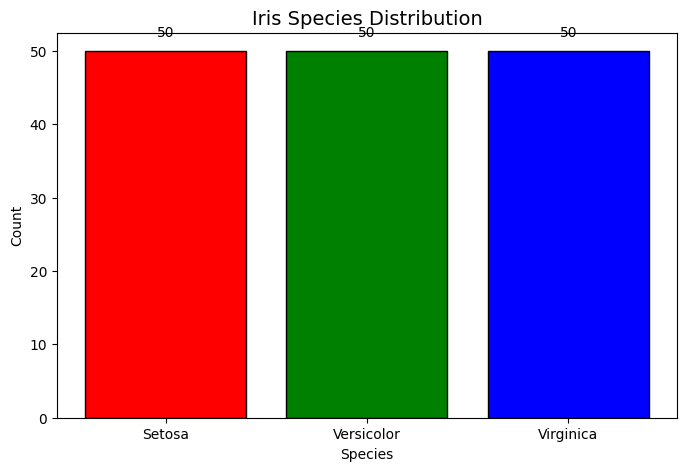

In [9]:
# Quick visualization
plt.figure(figsize=(8, 5))

species_counts = df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values,
        color=['red', 'green', 'blue'], edgecolor='black')

plt.title('Iris Species Distribution', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Species')

for i, v in enumerate(species_counts.values):
    plt.text(i, v + 2, str(v), ha='center')

plt.show()

# STEP 4: PREPARE DATA

In [10]:
X = df[iris.feature_names]
y = df['species']

print(f"Features: {list(X.columns)}")
print(f"Target: species (0=Setosa, 1=Versicolor, 2=Virginica)")
print(f"Shape: {X.shape}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: species (0=Setosa, 1=Versicolor, 2=Virginica)
Shape: (150, 4)


# STEP 5: TRAIN-TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")


Training samples: 120 (80.0%)
Testing samples: 30 (20.0%)
Features: 4


# STEP 6: TRAIN DEFAULT MODEL

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
print("Training Random Forest (default: 100 trees)...")

model_default = RandomForestClassifier(random_state=42)
model_default.fit(X_train, y_train)

Training Random Forest (default: 100 trees)...


RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred_default = model_default.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [17]:
# Evaluation
acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average='weighted')

print("--- Default Model Performance ---")
print(f"Accuracy: {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"F1-Score: {f1_default:.4f}")
print(f"Number of Trees: {model_default.n_estimators}")

--- Default Model Performance ---
Accuracy: 0.9000 (90.0%)
F1-Score: 0.8997
Number of Trees: 100


In [18]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_default,
                            target_names=iris.target_names))

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



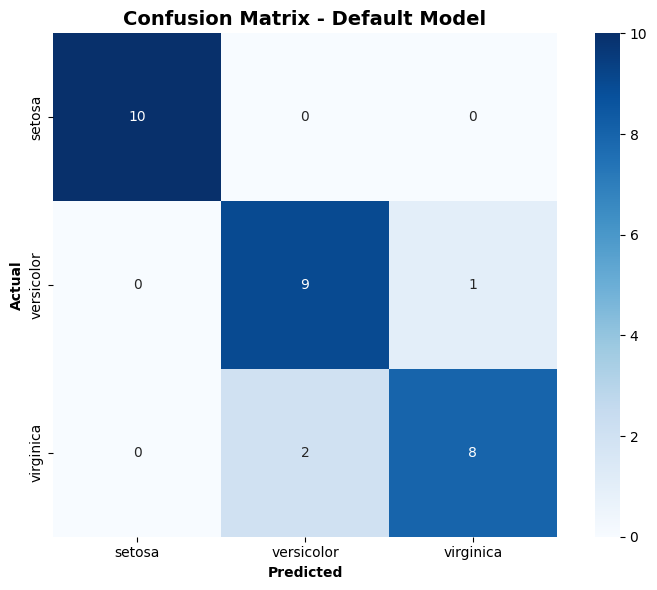

In [19]:
# Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title('Confusion Matrix - Default Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 7: OUT-OF-BAG (OOB) SCORE (KEY FEATURE!)

In [20]:
print("💡 OOB Score: Random Forest's built-in validation!")
print("   • Each tree uses ~63% of data (bootstrap sampling)")
print("   • Remaining ~37% used for validation")
print("   • No need for separate validation set!")

# Train with OOB score enabled
model_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model_oob.fit(X_train, y_train)

print(f"\nOOB Score: {model_oob.oob_score_:.4f}")
print(f"Test Accuracy: {acc_default:.4f}")
print(f"Difference: {abs(model_oob.oob_score_ - acc_default):.4f}")

if abs(model_oob.oob_score_ - acc_default) < 0.05:
    print("\n✅ OOB score matches test accuracy - model generalizes well!")
else:
    print("\n⚠️ Large gap - possible overfitting")


💡 OOB Score: Random Forest's built-in validation!
   • Each tree uses ~63% of data (bootstrap sampling)
   • Remaining ~37% used for validation
   • No need for separate validation set!

OOB Score: 0.9417
Test Accuracy: 0.9000
Difference: 0.0417

✅ OOB score matches test accuracy - model generalizes well!


# STEP 8: CROSS-VALIDATION

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cv_scores = cross_val_score(model_default, X_train, y_train,
                             cv=5, scoring='accuracy', n_jobs=-1)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print(f"\n--- Comparison ---")
print(f"CV Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"OOB Score:            {model_oob.oob_score_:.4f}")
print(f"Test Accuracy:        {acc_default:.4f}")

CV Accuracy Scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
Mean CV Accuracy: 0.9500 (+/- 0.0167)

--- Comparison ---
CV Accuracy (5-fold): 0.9500
OOB Score:            0.9417
Test Accuracy:        0.9000


# STEP 9: HYPERPARAMETER TUNING

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("Running GridSearchCV...")
print("Expected time: 30-60 seconds...")

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n--- Best Hyperparameters Found ---")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Running GridSearchCV...
Expected time: 30-60 seconds...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

--- Best Hyperparameters Found ---
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 50
Best CV Accuracy: 0.9583


In [25]:
# Predict with tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

In [26]:
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("--- Tuned Model Performance ---")
print(f"Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.1f}%)")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"\nImprovement: {(acc_tuned - acc_default)*100:+.2f}%")

--- Tuned Model Performance ---
Accuracy: 0.9667 (96.7%)
F1-Score: 0.9666

Improvement: +6.67%


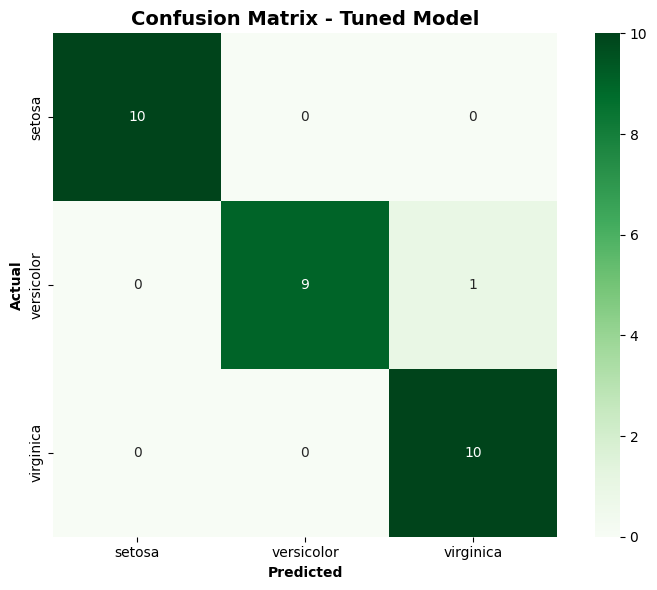

In [27]:
# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title('Confusion Matrix - Tuned Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()


# STEP 10: FEATURE IMPORTANCE (KEY FEATURE!)

In [28]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- Feature Importance (Ranked) ---")
print(feature_importance.to_string(index=False))


--- Feature Importance (Ranked) ---
          Feature  Importance
 petal width (cm)    0.449264
petal length (cm)    0.428807
sepal length (cm)    0.113252
 sepal width (cm)    0.008677


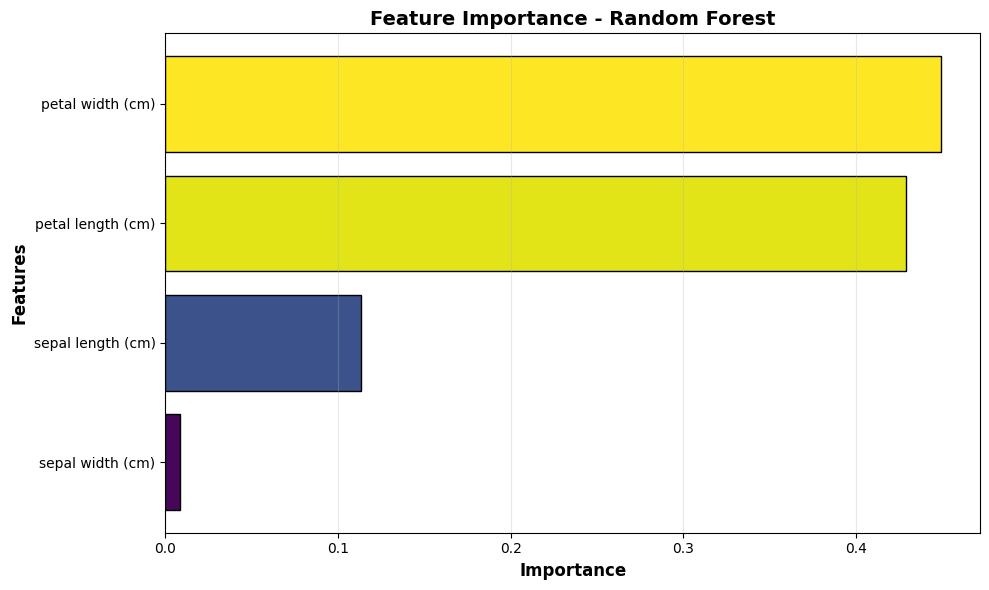


💡 Interpretation:
   • Most important feature: petal width (cm)
   • Importance score: 0.4493
   • This feature contributes most to classification across all trees


In [29]:
# Visualize
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(feature_importance['Importance'] / feature_importance['Importance'].max())

plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color=colors, edgecolor='black')
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.title('Feature Importance - Random Forest', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
most_important = feature_importance.iloc[0]
print(f"   • Most important feature: {most_important['Feature']}")
print(f"   • Importance score: {most_important['Importance']:.4f}")
print(f"   • This feature contributes most to classification across all trees")


# STEP 11: ENSEMBLE VISUALIZATION

In [30]:
print("\n--- Random Forest Structure ---")
print(f"✓ Number of Trees: {grid_search.best_estimator_.n_estimators}")
print(f"✓ Each tree votes on classification")
print(f"✓ Final prediction: Majority vote")

# Analyze individual trees
tree_depths = [tree.get_depth() for tree in grid_search.best_estimator_.estimators_]
tree_leaves = [tree.get_n_leaves() for tree in grid_search.best_estimator_.estimators_]

print(f"\n--- Tree Statistics (Across Ensemble) ---")
print(f"✓ Average Tree Depth: {np.mean(tree_depths):.2f}")
print(f"✓ Average Leaves per Tree: {np.mean(tree_leaves):.2f}")
print(f"✓ Min Depth: {np.min(tree_depths)}")
print(f"✓ Max Depth: {np.max(tree_depths)}")



--- Random Forest Structure ---
✓ Number of Trees: 50
✓ Each tree votes on classification
✓ Final prediction: Majority vote

--- Tree Statistics (Across Ensemble) ---
✓ Average Tree Depth: 3.50
✓ Average Leaves per Tree: 5.44
✓ Min Depth: 3
✓ Max Depth: 5


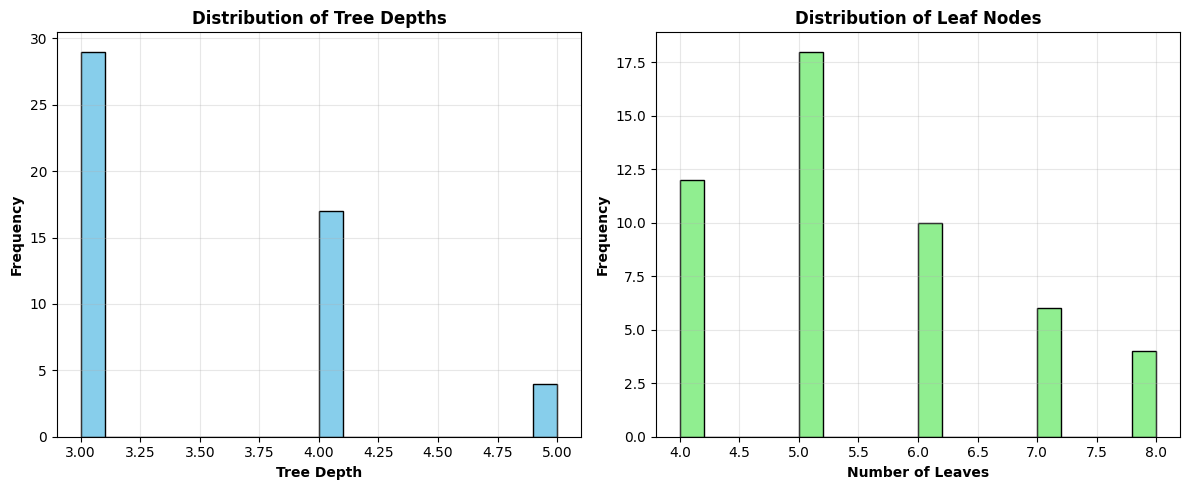


💡 Key Insight:
   • Each tree is different (bootstrap sampling + feature randomness)
   • Diversity in trees = Better ensemble performance
   • Averaging predictions = Lower variance, better generalization


In [31]:
# Visualize tree depth distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(tree_depths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tree Depth', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Tree Depths', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(tree_leaves, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Leaves', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Leaf Nodes', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("   • Each tree is different (bootstrap sampling + feature randomness)")
print("   • Diversity in trees = Better ensemble performance")
print("   • Averaging predictions = Lower variance, better generalization")

# STEP 12: MODEL COMPARISON

In [32]:
comparison = pd.DataFrame({
    'Model': ['Default', 'Tuned'],
    'Accuracy': [acc_default, acc_tuned],
    'F1-Score': [f1_default, f1_tuned],
    'Num Trees': [model_default.n_estimators, grid_search.best_estimator_.n_estimators]
})

print(comparison.to_string(index=False))

best_idx = comparison['Accuracy'].idxmax()
print(f"\nBest Model: {comparison.loc[best_idx, 'Model']}")
print(f"Best Accuracy: {comparison.loc[best_idx, 'Accuracy']:.4f}")

  Model  Accuracy  F1-Score  Num Trees
Default  0.900000  0.899749        100
  Tuned  0.966667  0.966583         50

Best Model: Tuned
Best Accuracy: 0.9667
